# Supplementary Practice Problems

These are similar to programming problems you may encounter in the mid-terms. They are not graded but we will review them in lab sessions.

In [1]:
# Libraries

%matplotlib inline

import re
import string
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

**1**. (10 points) Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

In [2]:
# Note: rows normalized ==> axis=1
# Use np.where(condition, value, else) to generate values, use dimension as last argument
xs = np.fromfunction(lambda i, j: np.where(i==j, i+1, 0), (3,4))
(xs - xs.mean(axis=1)[:, None]) / xs.std(axis=1)[:, None]

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

**2**. (10 points) A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

In [3]:
# Primitive fixed point function:
    # This function works by repeatedly applying the function to itself and checking for equality between x/y
    # This will only work if the fixed point lies in the path of the repeatedly mapped function
    # For sqrt, it will probably find the fixed point because repeatedly applying sqrt(x) ==> 1 for x0 > 1
def fixed_point(f, x0, max_iter=1000):
    x = f(x0)
    for i in range(max_iter):
        x = f(x)
        if np.abs(x - f(x)) < 1e-16:
            return x
    return None

In [4]:
# Apply to test data
fixed_point(np.sqrt, 10)

1.0

**3**. (10 points) Use `np.fromfunction` to construc the following matrices

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

```python
array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])
```

```python
array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])
```

In [5]:
# Matrix 1: i==j or i = 4-j, value equals 5-i
np.fromfunction(lambda i, j: np.where((i==j) | (i==4-j), 5-i, 0), (5,5), dtype="int")

array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])

In [6]:
# Matrix 2: checkerboard - (i-j) odd maps to 1, 0 otherwise
np.fromfunction(lambda i, j: np.where(np.abs(i-j)==1, 1, 0), (6,6), dtype="int")

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [7]:
# Matrix 3: gains value as it moves away from (3, 3)
np.fromfunction(lambda i, j: np.abs(i-3) + np.abs(j-3), (7,7), dtype="int")

array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])

**4**. (10 points) Read the `mtcars` data frame from R to a `pandas` DataFrame. Find the mean `wt` and `mpg` for all cars grouped by the number of `gear`s.

In [8]:
# Load R and data, use standard pandas code
%load_ext rpy2.ipython
mtcars = %R mtcars
mtcars.groupby("gear")[["wt", "mpg"]].mean()

C:\Users\petri\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


,wt,mpg
gear,,
3.0,3.892600,16.106667
4.0,2.616667,24.533333
5.0,2.632600,21.380000


**5**. (10 points) The QQ (Quirkiness Quotient) has a normal distribution with $\mu$ = 100 and $\sigma$ = 20. If your QQ is at the 92nd percentile, what is your QQ? 

- Solve this analytically using some distribution function
- Solve this using a simulation of 1,000,000 people
- Plot the QQ PDF for QQs between 40 and 160 as a blue curve, shading the region below your QQ in blue with 50% transparency.

In [9]:
# Analytic Solution
mu = 100
sd = 20
qq = 100 + st.norm.ppf(.92)* sd
print(qq)

128.10143120619267


In [10]:
# Simulation - generate draws and grab value 92% of the way into the sorted draws
n = 10**6
dist = st.norm(mu, sd)
draws = dist.rvs(n)
draws = np.sort(draws)
index = int(0.92*n)
draws[index]

128.11856078769762

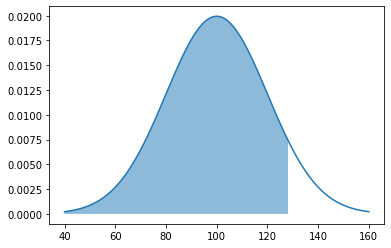

In [11]:
# QQ PDF plot
x = np.linspace(40, 160, 120)
plt.plot(x, dist.pdf(x))
filler = np.linspace(40, qq, 80)
plt.fill_between(filler, dist.pdf(filler), alpha=0.5);

**6**. (10 points) Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment. 

In [12]:
# Parameters
n = 100
k = 10

In [13]:
# np.random.choice vectorizes over n and k
draws = np.random.choice(["H", "T"], (n,k))

In [14]:
# Merge each trial into one string, add all H-streaks to one list
maxes = []
for i in ("".join(line) for line in draws):
    streak = re.findall("H+", i)
    maxes.append(max(streak, key=len))

In [15]:
# Find maximum length from streak list
len(max(maxes, key=len))

7

**7**. (10 points) Use the DNA sequence given below to answer these questions:

- Generate all sequences formed using a shifting window of size 3 and print the sequence with the highest count. If there are ties, print all the tied sequences. Do not use any import statement.

In [16]:
dna = '''
TCGGATGATTGCACTTATTCTCCGTTTGTTTGTGTGTTGCTGGGGGGGGACGCCTGCACGCTGTTCCAGTGCGTCGTCGT
ATCTTGGTTTGCCTCGGGGGGTGGGGCTGGAGCCTACCAGGTGTCGGTCGGATGTTTTGTCTCTGTGTGTCGAGGGTCGT
GTGGAGTCCCGGCGGGTGGGTGCTGCTGGGTGGTTGACACAGTGCGTGGTGGGTGCTTCAGCGGGGGGTGCCTCGCGCGT
GGCTGGGGTGTTGTAGTTGTCGTTTGGAAAGTGTGCGGCATAGGGGGGATGAAATCCGGTTGACCAAGATTCGGGTCGCG
TTTGGGGATTAGGATAGTTGGGTTTGGAAGGCGCGGGTATTGCCCACGTTCTTTGGCGGGGCGAGGGTGTTGGTACTCCA
TGTCCAGGCCGCTTGCCTACGGACTGTAGAGGTTCGGGAGGCGCTGGCCGGCGTGTGTTCCCTAGGTTTTGAGATAAGAG
'''

In [17]:
# Zip offset lists, load into dict, find max
dna = "".join(dna.split())
z = zip(dna, dna[1:], dna[2:])
d = {}
for i in z:
    if i in d.keys():
        d[i] += 1
    else:
        d[i] = 1

max(d.items(), key = lambda x: x[1])

(('G', 'G', 'G'), 36)

**8**. (10 points) Ignore spaces, case and punctuation when finding palindromes. Write code to find the palindromes among the 12 phrases below, returning the phrases that are palindromes in a list.

```
Daedalus: nine. Peninsula: dead.
Dammit, I'm mad!
Deliver me from evil.
Dennis and Edna sinned.
Devil never even lived.
Deviled eggs sure taste good.
Did Hannah see bees? Hannah did.
Do geese see God?
Do mice see God?
Dogma: I am God
Dogma: DNA makdes RNA makes protein.
Dubya won? No way, bud.
```

In [18]:
phrases = '''Daedalus: nine. Peninsula: dead.
Dammit, I'm mad!
Deliver me from evil.
Dennis and Edna sinned.
Devil never even lived.
Deviled eggs sure taste good.
Did Hannah see bees? Hannah did.
Do geese see God?
Do mice see God?
Dogma: I am God
Dogma: DNA makdes RNA makes protein.
Dubya won? No way, bud.'''

In [19]:
# Get rid of punctuation/whitespace, make placeholder object so we can print the original
lines = phrases.splitlines()
for line in lines:
    raw = line.lower().translate(str.maketrans("", "", string.punctuation + string.whitespace))
    if raw == raw[::-1]: print(line)

Daedalus: nine. Peninsula: dead.
Dammit, I'm mad!
Dennis and Edna sinned.
Devil never even lived.
Did Hannah see bees? Hannah did.
Do geese see God?
Dogma: I am God
Dubya won? No way, bud.
